# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/siri/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


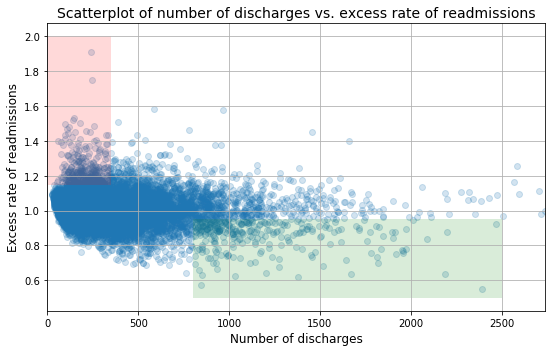

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Your turn
A. Based on the plots and statistics calculated below, I agree with the initial observations and statistics provided in A and B above. However, the downward trend of readmission ratio with number of discharges is only a slight one.

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


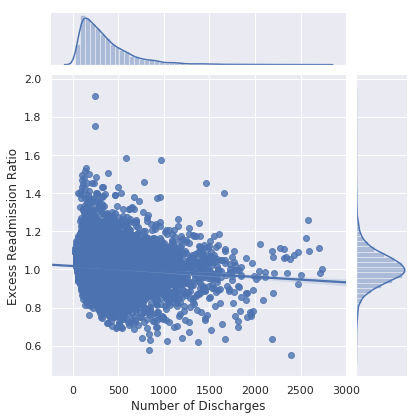

In [79]:
g = sns.JointGrid(y='Excess Readmission Ratio',x='Number of Discharges', 
              data=clean_hospital_read_df[81:-3])
g = g.plot(sns.regplot, sns.distplot)

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mean 1.022618
std 0.057954 
prob. of excess readm. rate > 1:  0.6321548821548821


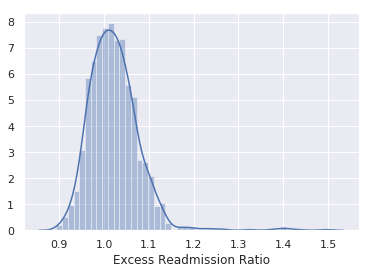

In [53]:
sns.distplot(small_df)
print('mean %f' %np.mean(small_df))
print('std %f ' %obs_std_small)
# probability of excess readm. rate > 1
p_gt_1_sm = np.sum(small_df > 1)/ len(small_df)
print('prob. of excess readm. rate > 1: ', p_gt_1_sm)

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mean 0.978335
std 0.119878 
prob. of excess readm. rate > 1:  0.4449244060475162


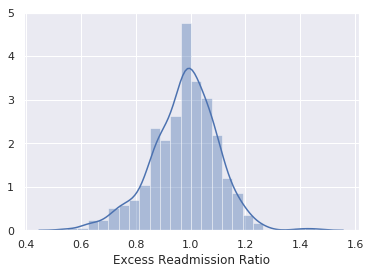

In [75]:
sns.distplot(large_df)
print('mean %f' %np.mean(large_df))
print('std %f ' %obs_std_large)
# probability of excess readm. rate > 1
p_gt_1_lg = np.sum(large_df > 1)/ len(large_df)
print('prob. of excess readm. rate > 1: ', p_gt_1_lg)

## Null hypothesis:
There is no correlation between hospital capacity (no. of discharges) and readmission rates

## Alternate hypothesis:
There is significant correlation between hospital capacity and readmission rates

In [54]:
small_df = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 300]['Excess Readmission Ratio']
print(len(small_df))
large_df = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio']
print(len(large_df))

6189
463


In [55]:
small_na = small_df.loc[small_df.isna()]
print(len(small_na))
large_na = large_df.loc[large_df.isna()]
print(len(large_na))

81
0


In [56]:
small_df = small_df.dropna()

In [57]:
def get_permutation_sample(d1, d2):
    d = np.concatenate((d1, d2))
    perm_d = np.random.permutation(d)
    return perm_d[:len(d1)], perm_d[len(d1):]

In [58]:
def get_perm_reps(d1, d2, n_samples, func):
    reps = np.empty(n_samples)
    for i in range(n_samples):
        p1, p2 = get_permutation_sample(d1, d2)
        reps[i] = func(p1, p2)
    return reps

In [59]:
def diff_of_means(d1, d2):
    return np.mean(d1) - np.mean(d2)

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


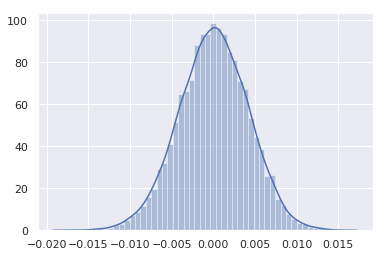

In [60]:
perm_reps = get_perm_reps(small_df, large_df, 10000, diff_of_means)
sns.set()
sns.distplot(perm_reps)

In [61]:
obs_diff_means = np.mean(small_df) - np.mean(large_df)
print(obs_diff_means)

0.035902791014437385


In [62]:
p_val = np.sum(perm_reps >= obs_diff_means)/len(perm_reps)
print(p_val)

0.0


This means that there is significant evidence to reject the null hypothesis (for alpha = 0.01)

## statistical vs practical significance:

In [63]:
# 95% confidence interval
obs_std_small = np.std(small_df)
obs_std_large = np.std(large_df)
# std deviation of difference of distributions
obs_std = np.sqrt(obs_std_small**2/len(small_df) + obs_std_large**2/len(large_df))
print(obs_std)

0.005670245847134284


In [64]:
z_range = stats.norm.interval(.95, loc=obs_diff_means, scale=obs_std)
print(z_range)

(0.02478931337056638, 0.047016268658308394)


Though the result is statistically significant, it may not be practically significant as the small hospitals have a readmission ratio (on avg.) only 0.04 higher than the large hospitals. This is only 4% of the threshold value of readmission ratio (1) required to qualify as an excess value

Statistical significance does not provide any information about the size of the effect, it only contemplates whether or not there is an effect. Practical significance, on the other hand, is concerened with the size of the effect

If we had enough subject expertise to say that (for example) the minimum threshold for difference in average readmission ratio was 0.05 (5% of 1) in order to have a practical significance, we could dismiss the results of the study (avg difference in ratio of 0.044) as not being practically significant. And in such a case would not be able to make the recommendation to smaller hospitals to upgrade resource allocation.
Also, looking at the 95% confidence interval for the difference in sample means (above), there doesn't seem to be a significant probability that the true population difference in means (the magnitude of the true effect) will be practically significant (as the entire interval is less than the assumed threshold for practical significance)

## plots:

### jointplot with histograms:

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


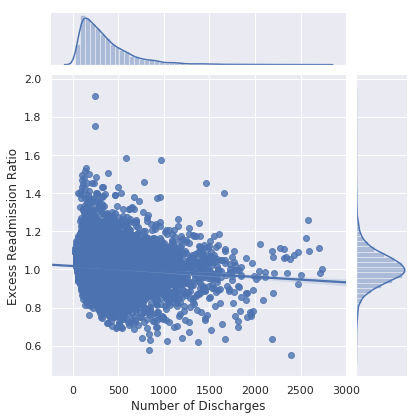

In [79]:
g = sns.JointGrid(y='Excess Readmission Ratio',x='Number of Discharges', 
              data=clean_hospital_read_df[81:-3])
g = g.plot(sns.regplot, sns.distplot)

### kde plot:

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


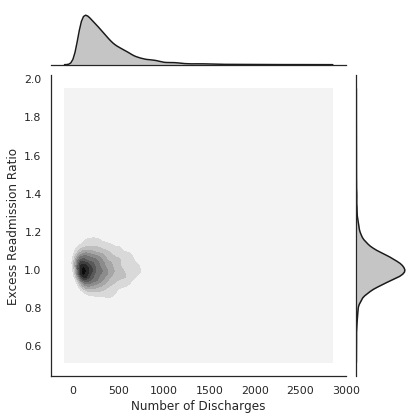

In [81]:
with sns.axes_style('white'):
    sns.jointplot(y='Excess Readmission Ratio',x='Number of Discharges', 
                  data=clean_hospital_read_df[81:-3], kind='kde', color='k')

### hexbin plot:

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


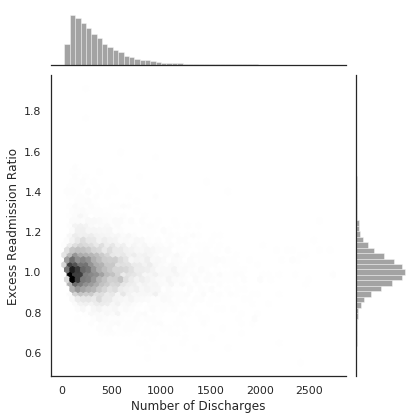

In [77]:
with sns.axes_style('white'):
    sns.jointplot(y='Excess Readmission Ratio',x='Number of Discharges', 
                  data=clean_hospital_read_df[81:-3], kind='hex', color='k')

The kernel density estimation (kde) plot or the hexbin plot (both shown above) are better than a plain scatter plot to show the frequency distribution of bivariate samples. The jointplot (also shown above) with histograms and trendline is also a good alternative to a simple scatter plot.